In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 6)

# To load the final cleaned dataset directly
df = pd.read_csv("data/final_supermarket_sales.csv")

df.head()

,Date,Time,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Sale or Return,Discount (Yes/No),Item Name,Wholesale Price (RMB/kg),Loss Rate (%)
0,2023-03-06,15:18:20.721,102900011030110,1.000,4.9,sale,No,Spinach (Bag),2.268270,9.43
1,2023-02-16,15:16:45.757,102900011030059,1.000,6.9,sale,No,Yunnan Lettuce (Bag),2.607857,9.43
2,2022-01-27,18:30:13.762,102900011030042,1.000,1.9,sale,No,Zhijiang Red Bolt (Bag),1.231538,9.43
3,2022-02-12,17:36:21.275,102900005118817,0.315,14.0,sale,No,Spinach,6.495138,18.51
4,2022-08-10,12:59:55.615,102900005116530,0.153,23.6,sale,No,Xixia Mushroom (1),12.115329,13.82


In [7]:
df.isna().sum()

Date                           0
Time                           0
Item Code                      0
Quantity Sold (kilo)           0
Unit Selling Price (RMB/kg)    0
Sale or Return                 0
Discount (Yes/No)              0
Item Name                      0
Wholesale Price (RMB/kg)       0
Loss Rate (%)                  0
dtype: int64

In [8]:
#To import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To show plots inside notebook
%matplotlib inline

# To make plots a bit bigger by default
plt.rcParams["figure.figsize"] = (10, 6)

In [9]:
#For quick look at data
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 803771 to 834679
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         100000 non-null  object 
 1   Time                         100000 non-null  object 
 2   Item Code                    100000 non-null  int64  
 3   Quantity Sold (kilo)         100000 non-null  float64
 4   Unit Selling Price (RMB/kg)  100000 non-null  float64
 5   Sale or Return               100000 non-null  object 
 6   Discount (Yes/No)            100000 non-null  object 
 7   Item Name                    100000 non-null  object 
 8   Wholesale Price (RMB/kg)     100000 non-null  float64
 9   Loss Rate (%)                100000 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 8.4+ MB


,Item Code,Quantity Sold (kilo),Unit Selling Price (RMB/kg),Wholesale Price (RMB/kg),Loss Rate (%)
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.030334e+14,0.537078,8.916667,5.890427,10.109131
std,7.229310e+11,0.630037,6.253717,3.371640,4.722186
min,1.029000e+14,-9.082000,0.400000,0.647183,0.000000
25%,1.029000e+14,0.289000,4.900000,4.062002,6.270000
50%,1.029000e+14,0.435000,8.000000,5.356686,9.430000
75%,1.029000e+14,0.739000,10.800000,6.826876,13.620000
max,1.069740e+14,160.000000,119.900000,64.413333,29.250000


C:\Users\kavya\AppData\Local\Temp\ipykernel_16036\734507097.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


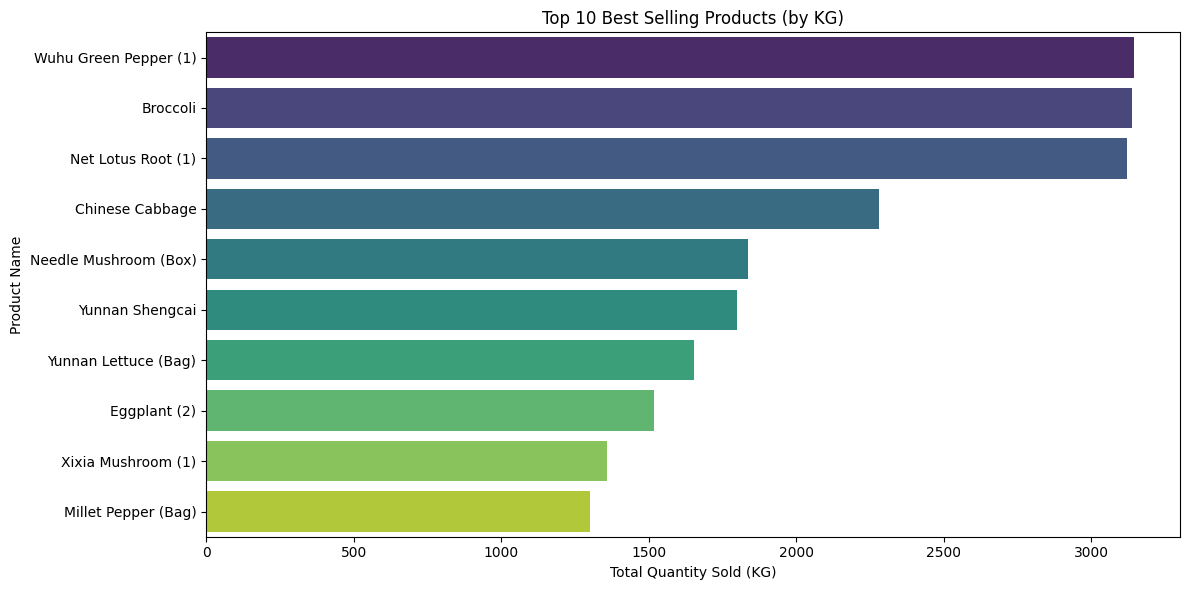

In [12]:
# Top 10 best selling items by quantity


top_products = df.groupby("Item Name")["Quantity Sold (kilo)"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best Selling Products (by KG)")
plt.xlabel("Total Quantity Sold (KG)")
plt.ylabel("Product Name")

# To save the image
plt.tight_layout()
plt.savefig("images/top_10_best_selling_products.png")

plt.show()

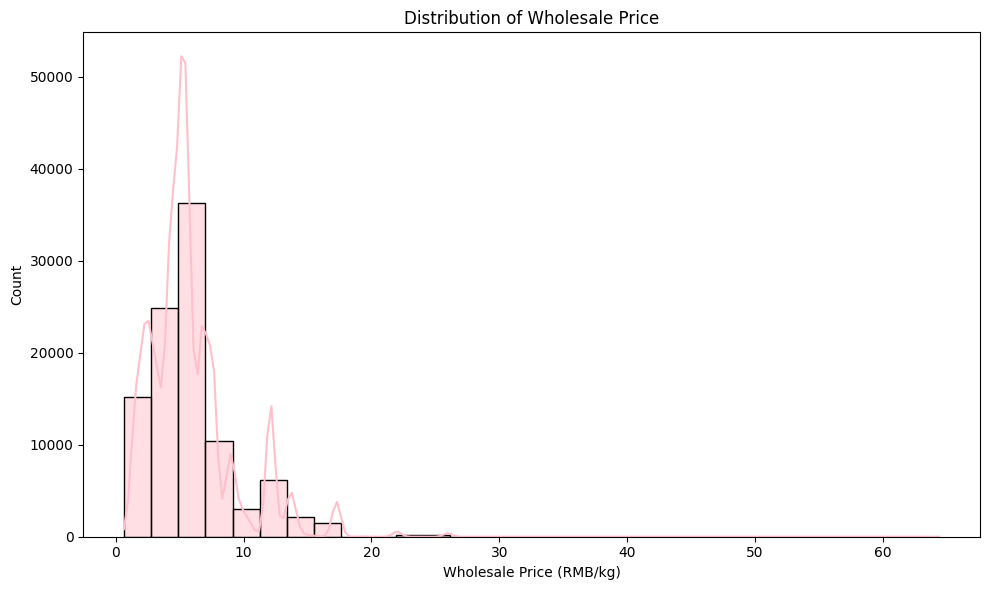

In [17]:
# Distribution of wholesale price

plt.figure(figsize=(10,6))
sns.histplot(df["Wholesale Price (RMB/kg)"], bins=30,color='pink', kde=True)
plt.title("Distribution of Wholesale Price")
plt.xlabel("Wholesale Price (RMB/kg)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("images/wholesale_price_distribution.png")
plt.show()

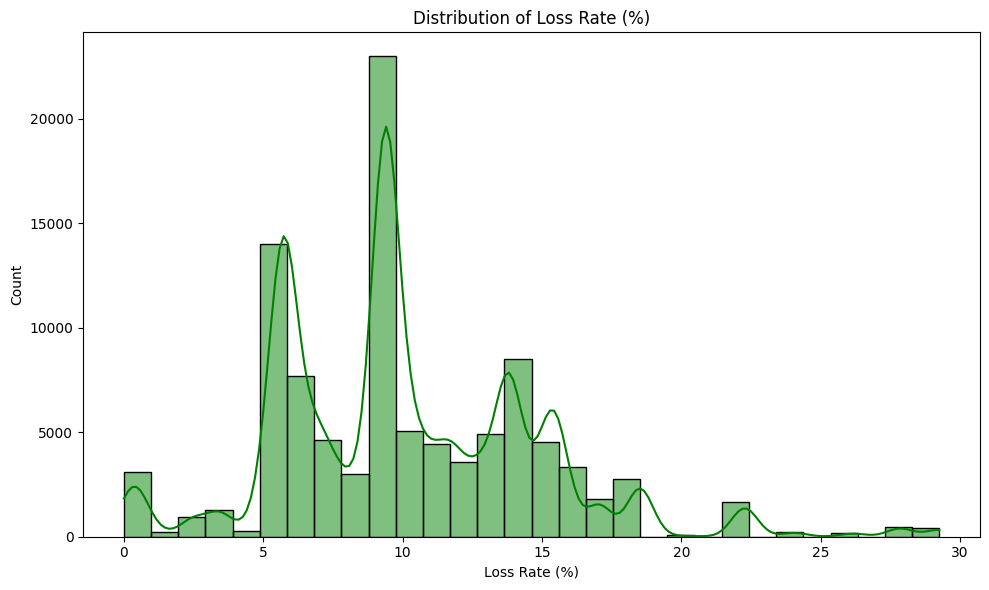

In [18]:
#Loss rate distribution

plt.figure(figsize=(10,6))
sns.histplot(df["Loss Rate (%)"], bins=30,color='Green', kde=True)
plt.title("Distribution of Loss Rate (%)")
plt.xlabel("Loss Rate (%)")
plt.ylabel("Count")

plt.tight_layout()
plt.savefig("images/loss_rate_distribution.png")
plt.show()

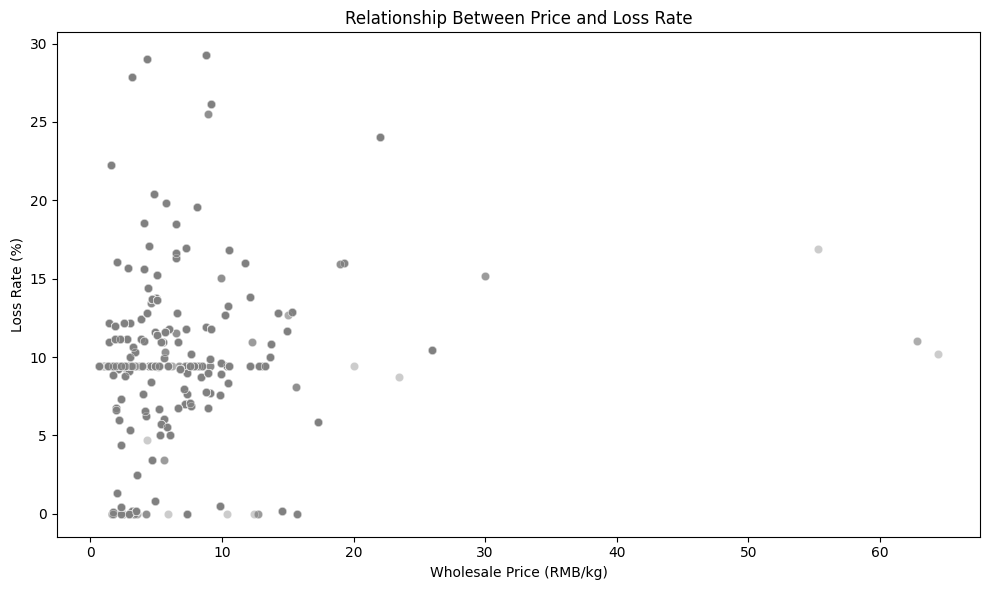

In [20]:
#Relationship between Price and Loss rate

plt.figure(figsize=(10,6))
sns.scatterplot(
    x=df["Wholesale Price (RMB/kg)"],
    y=df["Loss Rate (%)"],
    alpha=0.4,color='grey'
)
plt.title("Relationship Between Price and Loss Rate")
plt.xlabel("Wholesale Price (RMB/kg)")
plt.ylabel("Loss Rate (%)")

plt.tight_layout()
plt.savefig("images/price_vs_loss_rate.png")
plt.show()

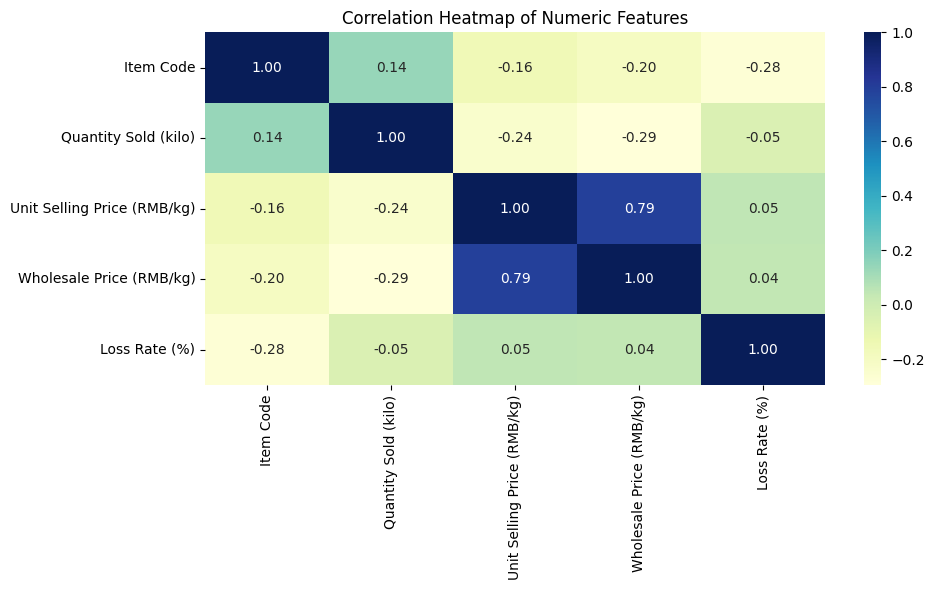

In [21]:
#Correlation heatmap of Price,Quantity and Loss Rate

import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(
    df.corr(numeric_only=True),
    annot=True,
    cmap="YlGnBu",
    fmt=".2f"
)
plt.title("Correlation Heatmap of Numeric Features")

plt.tight_layout()
plt.savefig("images/correlation_heatmap.png")
plt.show()